In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets


In [ ]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
# First, we initialize the model.
model = tf.keras.models.Sequential()

In [ ]:
# First our input layer. For this layer, and this layer only, we need to specify the size of our input. For our dataset this means the amount of columns in our X.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(X.shape[1],)))
# Now some hidden layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
# Finally, our output layer. Since we have 3 possible classes, we need 3 output neurons. 
# For a regression problem, we would have only 1. For an image creation network, we would have as many pixels as the image we wanted to create!
model.add(tf.keras.layers.Dense(3))
# A final layer with several output neurons gives us logits as results. 
#We can do a final pass with a Softmax layer to turn them into percentages.
model.add(tf.keras.layers.Softmax())

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=optim,metrics=['accuracy'])

In [ ]:
history = model.fit(X_train.values, y_train.values,
        validation_data=(X_test.values, y_test.values),
        epochs = 20,
        batch_size=32)


Epoch 1/20
4/4 [==============================] - 1s 66ms/step - loss: 1.1134 - accuracy: 0.5750 - val_loss: 1.0329 - val_accuracy: 0.5333
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 1.0068 - accuracy: 0.5333 - val_loss: 0.9423 - val_accuracy: 0.5667
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 0.9214 - accuracy: 0.6917 - val_loss: 0.8431 - val_accuracy: 0.7667
Epoch 4/20
4/4 [==============================] - 0s 9ms/step - loss: 0.8194 - accuracy: 0.8000 - val_loss: 0.7328 - val_accuracy: 0.8000
Epoch 5/20
4/4 [==============================] - 0s 9ms/step - loss: 0.7143 - accuracy: 0.8500 - val_loss: 0.6437 - val_accuracy: 0.8667
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 0.6066 - accuracy: 0.9667 - val_loss: 0.5445 - val_accuracy: 0.9333
Epoch 7/20
4/4 [==============================] - 0s 15ms/step - loss: 0.4981 - accuracy: 0.9500 - val_loss: 0.4165 - val_accuracy: 0.9333
Epoch 8/20
4/4 [==============

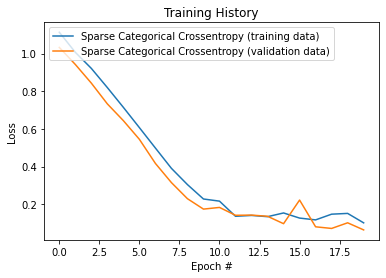

In [ ]:
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()


In [ ]:
model.predict(X_test[:1])

#10: Ver el desempeño
predictions = model.predict(X_test)
for idx, prediction in enumerate(predictions):
    print('We predict: '+str(np.argmax(prediction))+'. Real Species was: '+str(y_test.iloc[idx]))

We predict: 1. Real Species was: 1
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 0. Real Species was: 0
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 0. Real 